In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, expect, FloquetBasis,
                   num, plot_wigner, ket, sesolve, sigmax, sigmaz)

In [36]:
# Constants
delta = 0.2 * 2 * np.pi
eps0 = 1 * 2 * np.pi
A = 2.5 * 2 * np.pi
omega = .01* 2 * np.pi
T = 2 * np.pi / omega

# Hamiltonian
H = [
    -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz(),
    [A / 2 * sigmax(), "sin({w}*t)".format(w=omega)],
]

Winger distribution

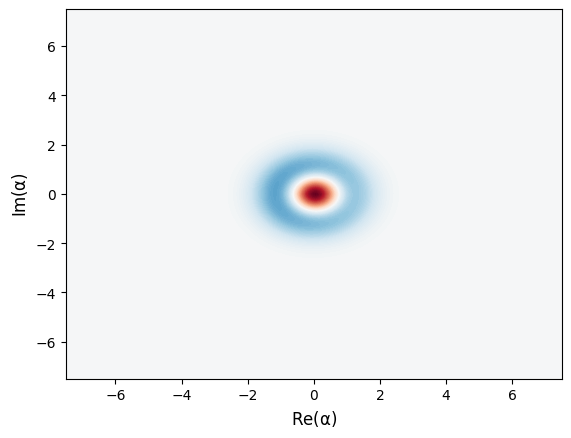

In [37]:
fbasis = FloquetBasis(H, T)
f_modes_t0 = fbasis.mode(t=0)
plot_wigner(f_modes_t0[0]);

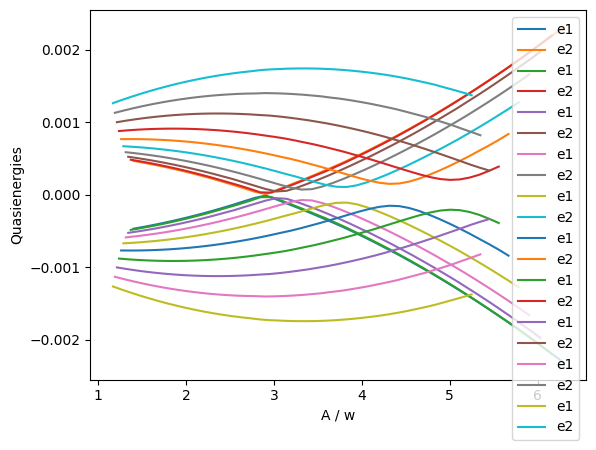

In [55]:
omegas = np.linspace(.01* 2 * np.pi, .012 * 2 * np.pi, 10)
A_list = np.linspace(1.0 * omega, 4.5 * omega, 40)

for omega in omegas:
    quasienergies1, quasienergies2 = [], []
    for A_tmp in A_list:
        # temporary Hamiltonian
        H_tmp = [
            -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz(),
            [A_tmp / 2 * sigmax(), "sin({w}*t)".format(w=omega)],
        ]
        # floquet modes and quasienergies
        e1, e2 = FloquetBasis(H_tmp, T, sort=True).e_quasi
        quasienergies1.append(e1), quasienergies2.append(e2)
    plt.plot(A_list / omega, quasienergies1, label="e1")
    plt.plot(A_list / omega, quasienergies2, label="e2")
    plt.xlabel("A / w"), plt.ylabel("Quasienergies")
    plt.legend();

In [56]:
# Define an initial state:
psi0 = ket("0") + ket("1")
psi0 = psi0.unit()

# Decompose the initial state into its components in the Floquet modes:
f_coeff = fbasis.to_floquet_basis(psi0, t=0)
f_coeff

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.63383403+0.00843583j]
 [0.77337707+0.00843583j]]

In [72]:
# Constants
delta = 0.2 * 2 * np.pi
eps0 = 1 * 2 * np.pi
A = 2.5 * 2 * np.pi
omega = 1.0 * 2 * np.pi
T = 2 * np.pi / omega

# Hamiltonian
H = [
    -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz(),
    [A / 2 * sigmax(), "sin({w}*t)".format(w=omega)],
]

In [73]:
t = 1.0
f_modes_t1 = fbasis.mode(t=t)
f_modes_t1

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.02223439+0.01120951j]
  [-0.99803158+0.05755004j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.99803158-0.05755004j]
  [-0.02223439+0.01120951j]]]

In [74]:
omega = 1.0 * 2 * np.pi

A_list = np.linspace(1.0 * omega, 4.5 * omega, 20)

quasienergies1, quasienergies2 = [], []
for A_tmp in A_list:
    # temporary Hamiltonian
    H_tmp = [
        -delta / 2.0 * sigmax() - eps0 / 2.0 * sigmaz(),
        [A_tmp / 2 * sigmax(), "sin({w}*t)".format(w=omega)],
    ]
    # floquet modes and quasienergies
    e1, e2 = FloquetBasis(H_tmp, T, sort=True).e_quasi
    quasienergies1.append(e1), quasienergies2.append(e2)

In [75]:
psi_t = fbasis.from_floquet_basis(f_coeff, t)
psi_t

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.75888474-0.02102929j]
 [-0.65065608+0.01724698j]]

`FloquetBasis` allows Floquet mode propagators for multiple times by specifying times to `precompute`

In [76]:
tlist = np.linspace(0, T, 50)
fbasis = FloquetBasis(H, T, precompute=tlist)

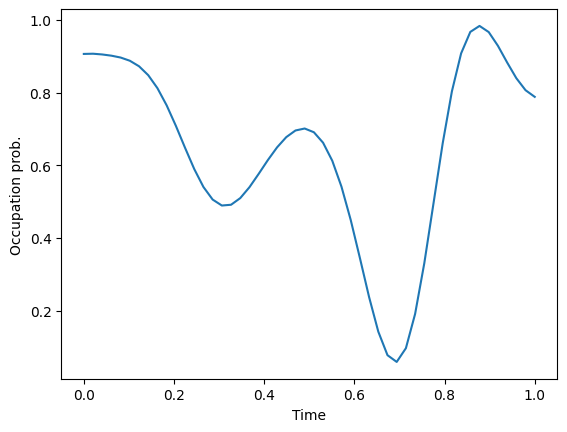

In [77]:
p_ex_period = []
for t in tlist:
    psi_t = fbasis.from_floquet_basis(f_coeff, t)
    p_ex_period.append(expect(num(2), psi_t))

plt.plot(tlist, p_ex_period)
plt.ylabel("Occupation prob."), plt.xlabel("Time");

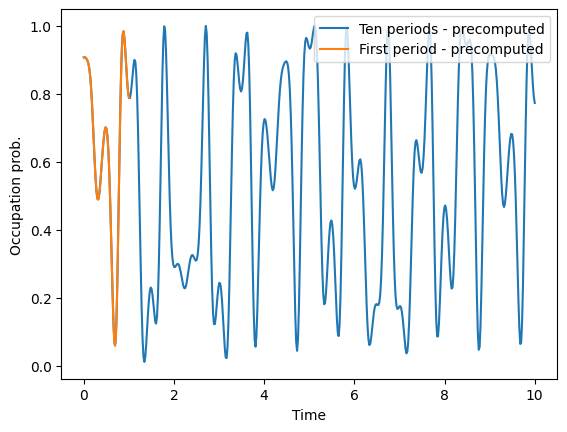

In [78]:
p_ex = []
tlist_10_periods = np.linspace(0, 10 * T, 10 * len(tlist))
for t in tlist_10_periods:
    psi_t = fbasis.from_floquet_basis(f_coeff, t)
    p_ex.append(expect(num(2), psi_t))

# Plot the occupation Probability
plt.plot(tlist_10_periods, p_ex, label="Ten periods - precomputed")
plt.plot(tlist, p_ex_period, label="First period - precomputed")
plt.legend(loc="upper right")
plt.xlabel("Time"), plt.ylabel("Occupation prob.");